# HR Analytics Project- Understanding the Attrition in HR

# Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [8]:
Hrdf=pd.read_csv(r"C:\Users\sai\Downloads\ibm-hr-analytics-employee-attrition-performance (1)\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [10]:
Hrdf

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [12]:
Hrdf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [16]:
Hrdf.shape

(1470, 35)

In [18]:
Hrdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [19]:
Hrdf.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
Hrdf.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no null value in given data set.

# Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

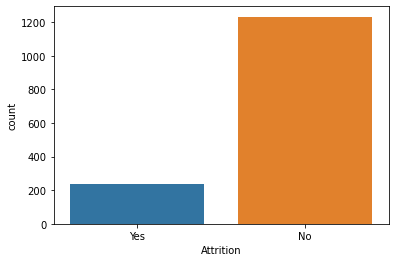

In [22]:
sns.countplot(x='Attrition',data=Hrdf)

In [23]:
Hrdf['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

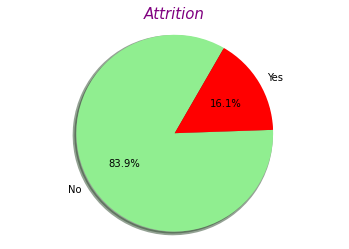

In [24]:
plt.pie(x=Hrdf['Attrition'].value_counts(),labels=Hrdf['Attrition'].value_counts().index,
            data=Hrdf,shadow=True,startangle=60,autopct='%1.1f%%',colors=['lightgreen','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title(Hrdf.columns[1],fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

16 % Employees are willing for attrition

In [25]:
Hrdf['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

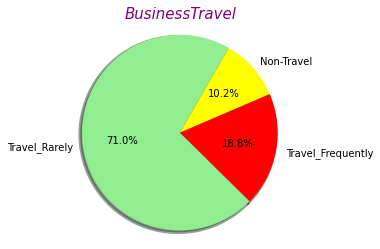

In [26]:
plt.pie(x=Hrdf['BusinessTravel'].value_counts(),labels=Hrdf['BusinessTravel'].value_counts().index,
            data=Hrdf,shadow=True,startangle=60,autopct='%1.1f%%',colors=['lightgreen','red','yellow'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title(Hrdf.columns[2],fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

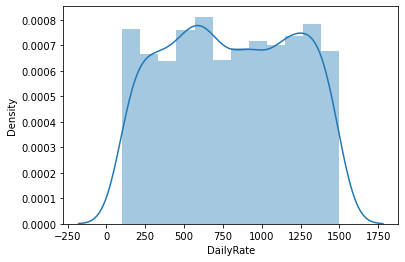

In [27]:
sns.distplot(Hrdf['DailyRate'])

<AxesSubplot:xlabel='Department', ylabel='count'>

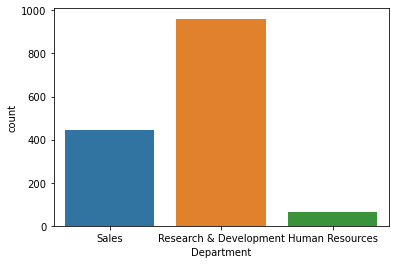

In [28]:
sns.countplot(Hrdf['Department'])

In [29]:
Hrdf['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

(i) There are three departments in the company - Sales, Research & Development Department and Human Resources

(ii) Research Development - 961, Sales - 446, Human Resources- 63

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Count'>

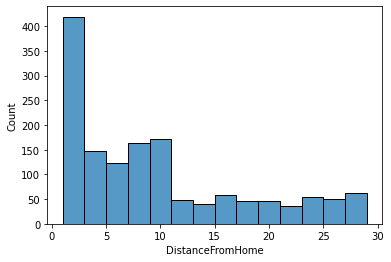

In [30]:
sns.histplot(Hrdf['DistanceFromHome'])

(i) Maximum employees are from nearby location

(ii) Maximum distance from home is 28 Kms

In [31]:
Hrdf['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [32]:
Hrdf['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

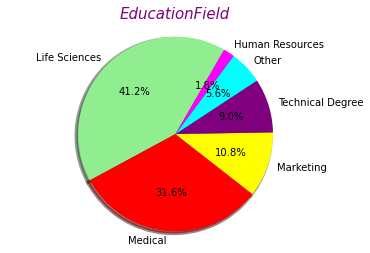

In [33]:
plt.pie(x=Hrdf['EducationField'].value_counts(),labels=Hrdf['EducationField'].value_counts().index,
            data=Hrdf,shadow=True,startangle=60,autopct='%1.1f%%',colors=['lightgreen','red','yellow','purple','cyan','magenta'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title(Hrdf.columns[7],fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

Out of all the emplolyees (i) 41.2 % from Life Sciences (ii) 31.6% from Medical (iii) 10.8 % from Marketing (iv) 9 % from Technical Degree (v) 5.6 % from Others (vi) 1.8 % from Human Resouce.

In [35]:
Hrdf['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

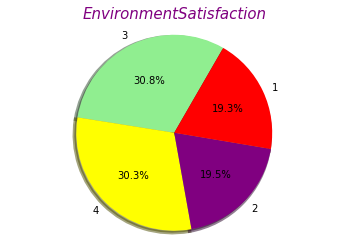

In [36]:
plt.pie(x=Hrdf['EnvironmentSatisfaction'].value_counts(),labels=Hrdf['EnvironmentSatisfaction'].value_counts().index,
            data=Hrdf,shadow=True,startangle=60,autopct='%1.1f%%',colors=['lightgreen','yellow','purple','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title(Hrdf.columns[10],fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

Result of rating of environment is as follows:

(i) 1- 19.3%
, 2- 19.5% , 3 - 30.8 % ,4 - 30.3%

which implies that Environment is one of the reason of Attrition

<AxesSubplot:xlabel='Gender', ylabel='count'>

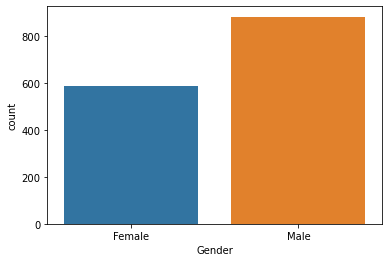

In [40]:
sns.countplot(x='Gender',data=Hrdf)

The Company has maintained a fair amount of Female employees along with Male Employees

<AxesSubplot:xlabel='Department', ylabel='count'>

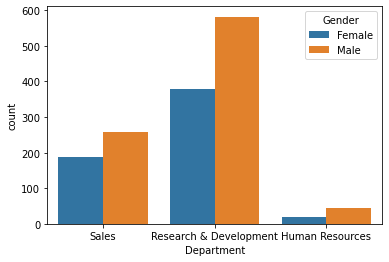

In [41]:
sns.countplot(x='Department',hue='Gender',data=Hrdf)

In all departments the Gender ratio is fair enough

<AxesSubplot:xlabel='HourlyRate', ylabel='Count'>

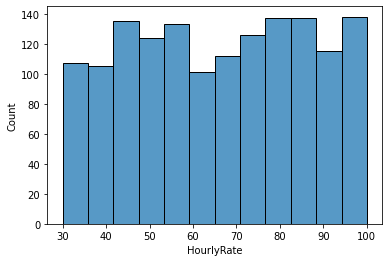

In [42]:
sns.histplot(Hrdf['HourlyRate'])

In [43]:
Hrdf['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

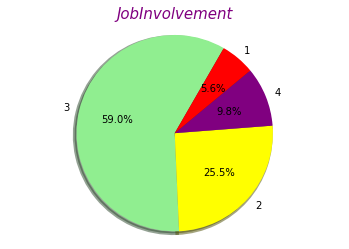

In [44]:
plt.pie(x=Hrdf['JobInvolvement'].value_counts(),labels=Hrdf['JobInvolvement'].value_counts().index,
            data=Hrdf,shadow=True,startangle=60,autopct='%1.1f%%',colors=['lightgreen','yellow','purple','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title(Hrdf.columns[13],fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

Job involvement percentage rating is quiet satisfactory , this cannot be reason of attrition.

In [45]:
Hrdf['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

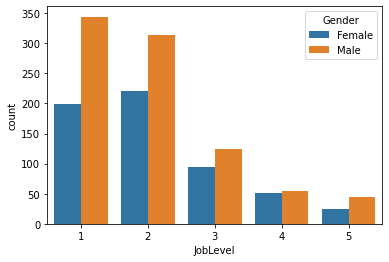

In [46]:
sns.countplot(x='JobLevel',hue='Gender',data=Hrdf)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

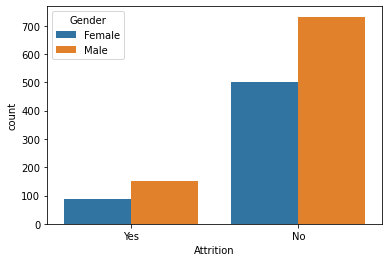

In [47]:
sns.countplot(x='Attrition',hue='Gender',data=Hrdf)

Male employees ratio is more in attrition

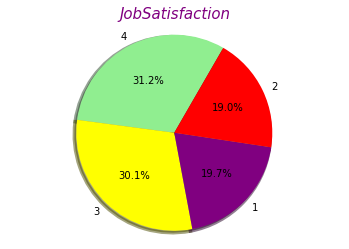

In [48]:
plt.pie(x=Hrdf['JobSatisfaction'].value_counts(),labels=Hrdf['JobSatisfaction'].value_counts().index,
            data=Hrdf,shadow=True,startangle=60,autopct='%1.1f%%',colors=['lightgreen','yellow','purple','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title(Hrdf.columns[16],fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

Job Satisfaction may be one another reason of attrition (i) Around 31.2% employess has given 4 ratings in Job Satisfaction , 30.1 % employees rated 3 , only 38% employees rated 1 and 2

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

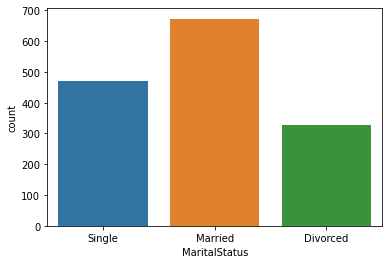

In [49]:
sns.countplot(x='MaritalStatus',data=Hrdf)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

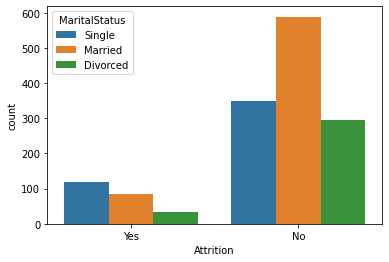

In [51]:
sns.countplot(x='Attrition',hue='MaritalStatus',data=Hrdf)

Marital status with 'Single' employees are more pron to Attrition

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

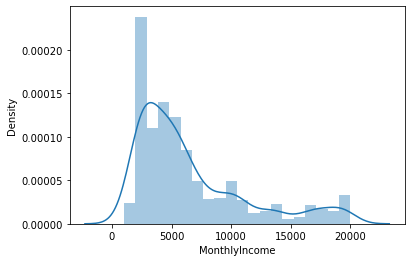

In [52]:
sns.distplot(Hrdf['MonthlyIncome'])

<AxesSubplot:xlabel='Gender', ylabel='MonthlyIncome'>

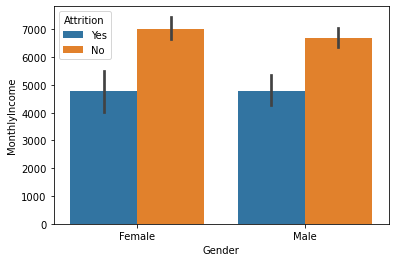

In [53]:
sns.barplot(y='MonthlyIncome',x='Gender',hue='Attrition',data=Hrdf)

(i) The employees within 5000 monthly income has choosen Attrition

(ii) Female employess are getting more monthly income than Male Employees

In [54]:
Hrdf['MonthlyRate'].value_counts()

4223     3
9150     3
9096     2
13008    2
12858    2
        ..
17071    1
23213    1
3835     1
25258    1
12287    1
Name: MonthlyRate, Length: 1427, dtype: int64

<AxesSubplot:xlabel='JobRole', ylabel='count'>

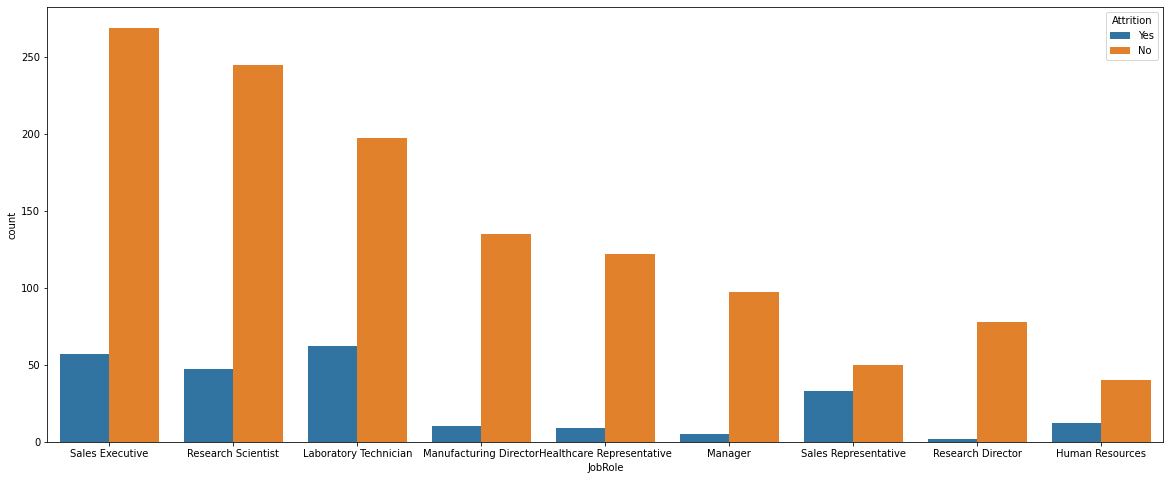

In [55]:
plt.figure(figsize=(20,8))
sns.countplot(x='JobRole',hue='Attrition',data=Hrdf)

(i)Highest number of employees are Sales Executive followed by Reserch Sc., Lab Tech,Manf Dir, Helth Rep,manager etc

(ii) The highest number of attrition in Lab Tech followed by Sales Executive, Research Sctst, Saltes Representative

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

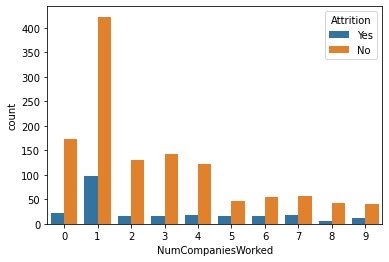

In [56]:
sns.countplot(x='NumCompaniesWorked',hue='Attrition',data=Hrdf)

Employees who has joined only one company earlier likely to opt for attrition rather than employees who has experience of number of companies

In [57]:
Hrdf['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

<AxesSubplot:xlabel='Over18', ylabel='count'>

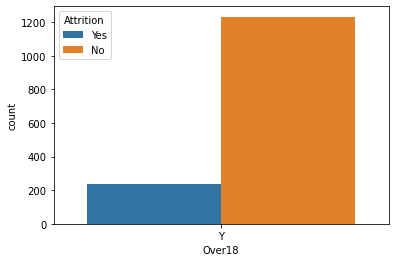

In [58]:
sns.countplot(x='Over18', hue='Attrition',data=Hrdf)

There is less chance of attrition those are Over 18

In [59]:
Hrdf['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

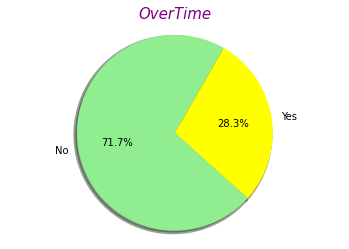

In [60]:
plt.pie(x=Hrdf['OverTime'].value_counts(),labels=Hrdf['OverTime'].value_counts().index,
            data=Hrdf,shadow=True,startangle=60,autopct='%1.1f%%',colors=['lightgreen','yellow','purple','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title(Hrdf.columns[22],fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='OverTime', ylabel='count'>

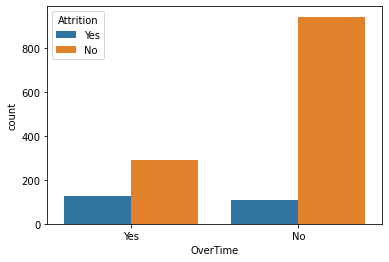

In [61]:
sns.countplot(x='OverTime',hue='Attrition',data=Hrdf)

71% employees didnot opt for overtime and Overtime does not playing any significant role in Attrition

In [62]:
Hrdf['PercentSalaryHike'].value_counts()

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

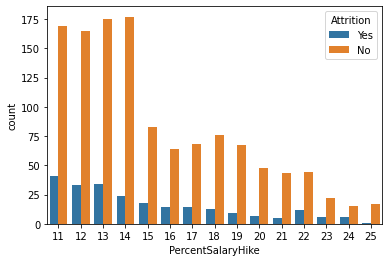

In [63]:
sns.countplot(x='PercentSalaryHike',hue='Attrition',data=Hrdf)

Those have less salary hike more likely to opt for attrition

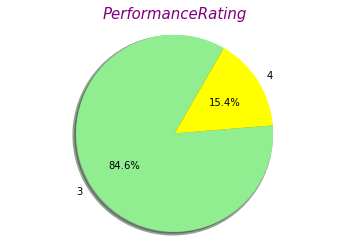

In [64]:
plt.pie(x=Hrdf['PerformanceRating'].value_counts(),labels=Hrdf['PerformanceRating'].value_counts().index,
            data=Hrdf,shadow=True,startangle=60,autopct='%1.1f%%',colors=['lightgreen','yellow','purple','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title(Hrdf.columns[24],fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

84% rated 3 and 15.4 % rated 4 for performance

In [65]:
Hrdf['RelationshipSatisfaction'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

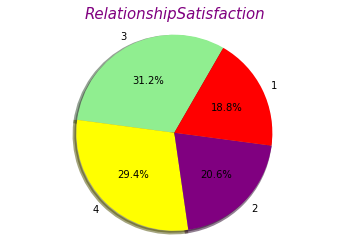

In [66]:
plt.pie(x=Hrdf['RelationshipSatisfaction'].value_counts(),labels=Hrdf['RelationshipSatisfaction'].value_counts().index,
            data=Hrdf,shadow=True,startangle=60,autopct='%1.1f%%',colors=['lightgreen','yellow','purple','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title(Hrdf.columns[25],fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

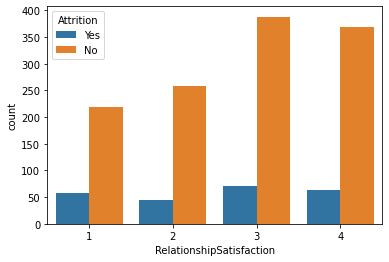

In [67]:
sns.countplot(x='RelationshipSatisfaction',hue='Attrition',data=Hrdf)

RelationshipSatisfaction doest not play any role in Attrition

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

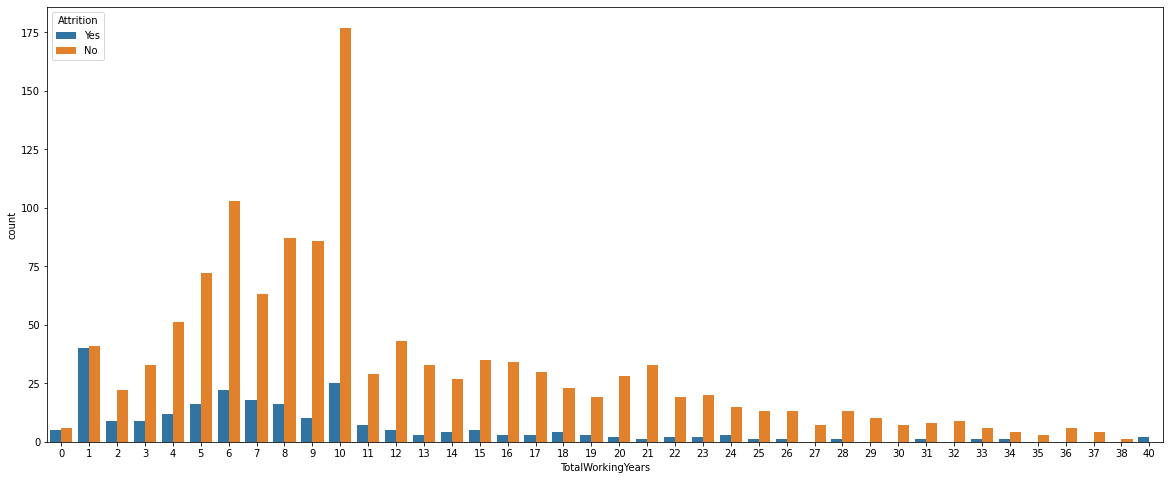

In [68]:
plt.figure(figsize=(20,8))
sns.countplot(x='TotalWorkingYears',hue='Attrition',data=Hrdf)

Employees with one year in company has highest number of Attrition

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

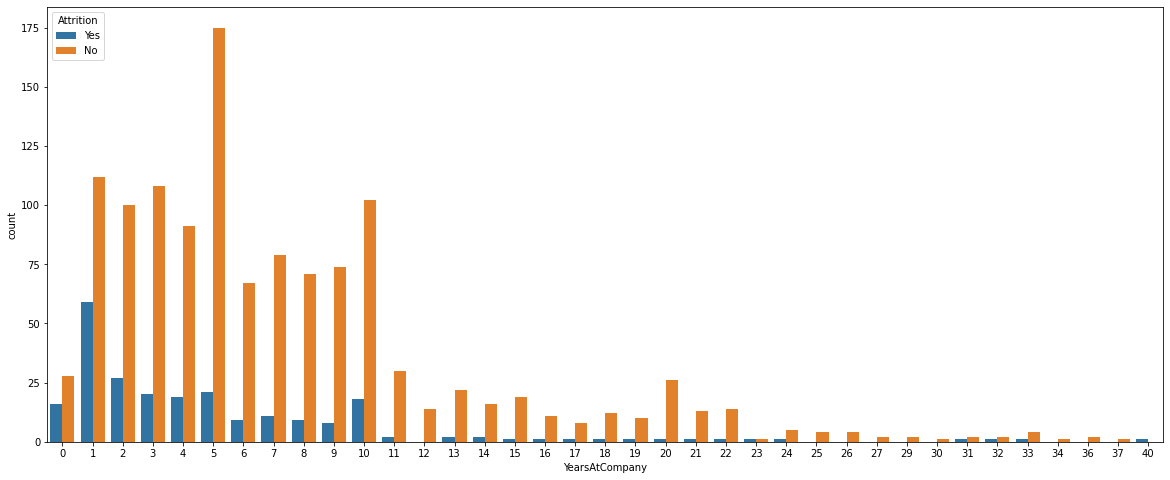

In [69]:
plt.figure(figsize=(20,8))
sns.countplot(x='YearsAtCompany',hue='Attrition',data=Hrdf)

Employees with one year in company has highest number of Attrition

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='count'>

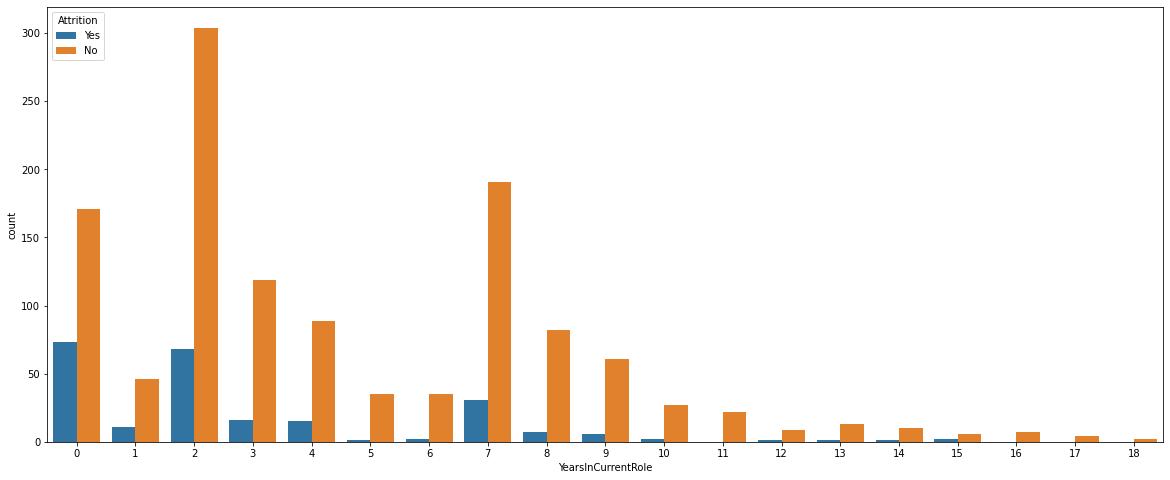

In [70]:
plt.figure(figsize=(20,8))
sns.countplot(x='YearsInCurrentRole',hue='Attrition',data=Hrdf)

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

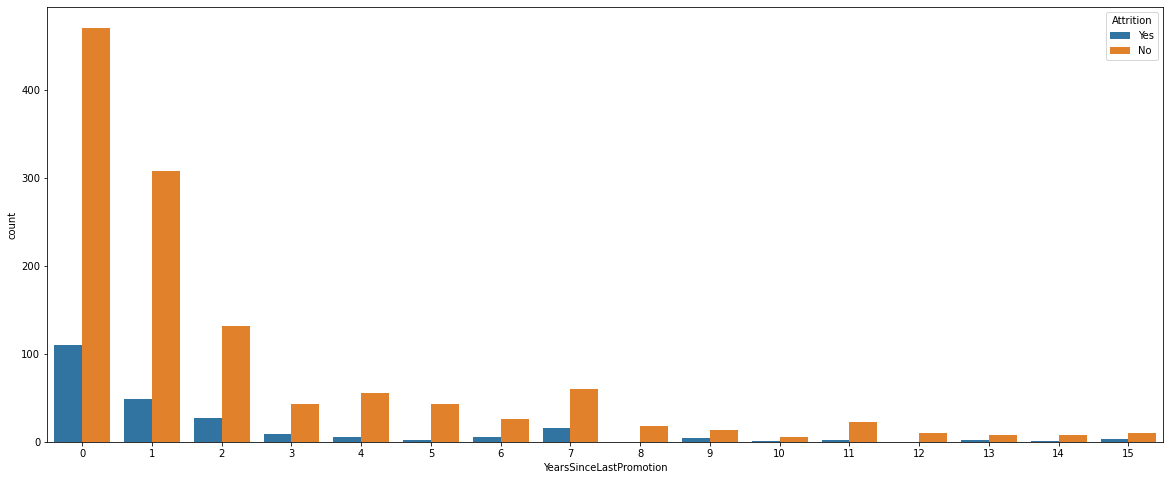

In [71]:
plt.figure(figsize=(20,8))
sns.countplot(x='YearsSinceLastPromotion',hue='Attrition',data=Hrdf)

Employees having gone upto 2 years since last promotion have higher Attrition

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

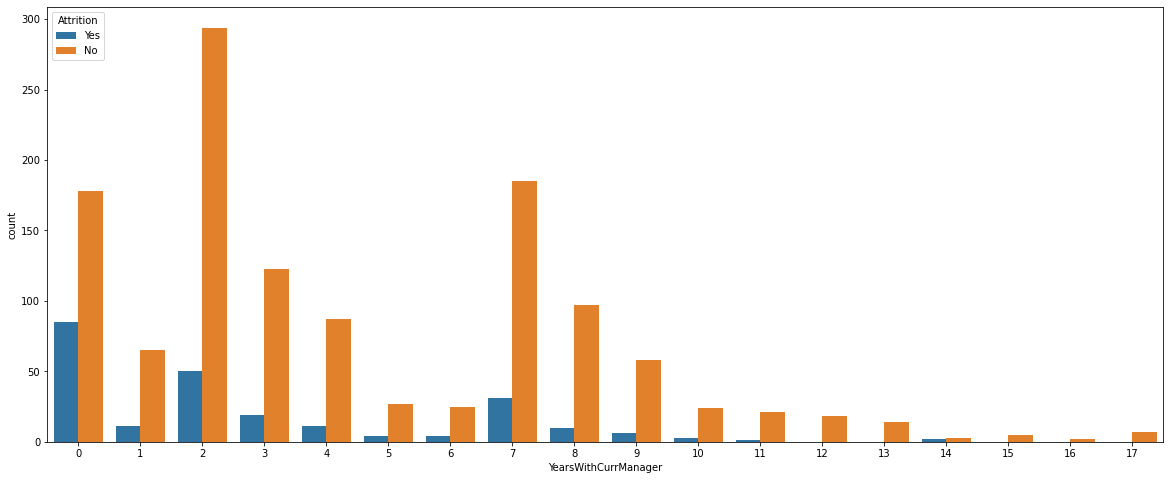

In [72]:
plt.figure(figsize=(20,8))
sns.countplot(x='YearsWithCurrManager',hue='Attrition',data=Hrdf)

Less time spent with current manager can be a reason for Attrition. Less than one year spent with current manager has the highest attrition rate

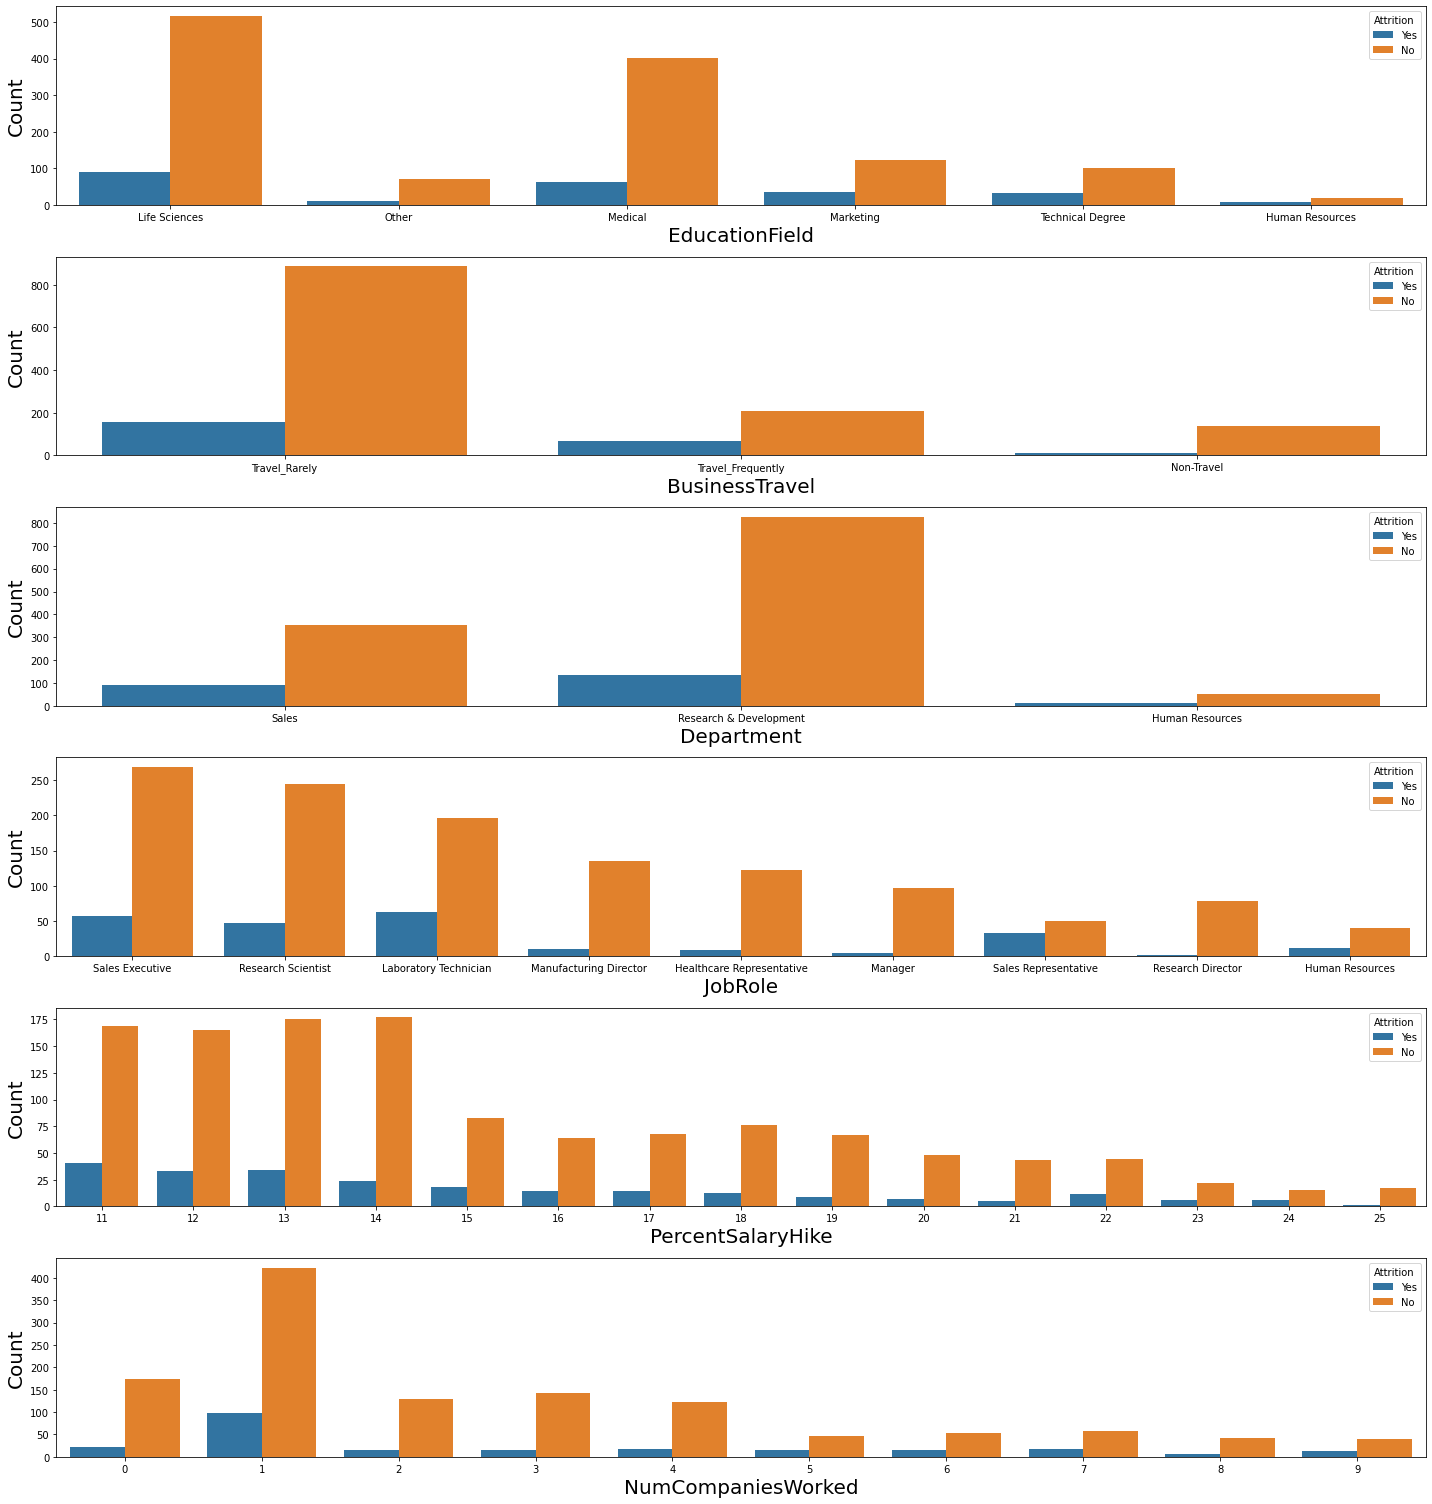

In [73]:
plt.figure(figsize=(20,21))
num=1
X = Hrdf[['EducationField','BusinessTravel','Department','JobRole','PercentSalaryHike','NumCompaniesWorked']]
y = Hrdf['Attrition']
for col in X:
    if num<=10:
        plt.subplot(6,1,num)
        sns.countplot(X[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    num=num+1
plt.tight_layout()

(i) Employees from Life Science Education Field leave more followedby medical

(ii) Those whoe travel rarely likely to leave the organization

In [75]:
Hrdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [76]:
Hrdf.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Drop Unwanted columns

In [77]:
Hrdf.drop(columns = ['EmployeeCount','Over18','StandardHours','EmployeeNumber'],inplace=True)

few columns are not relavent to target so, we dropped it

# Correlation

<AxesSubplot:>

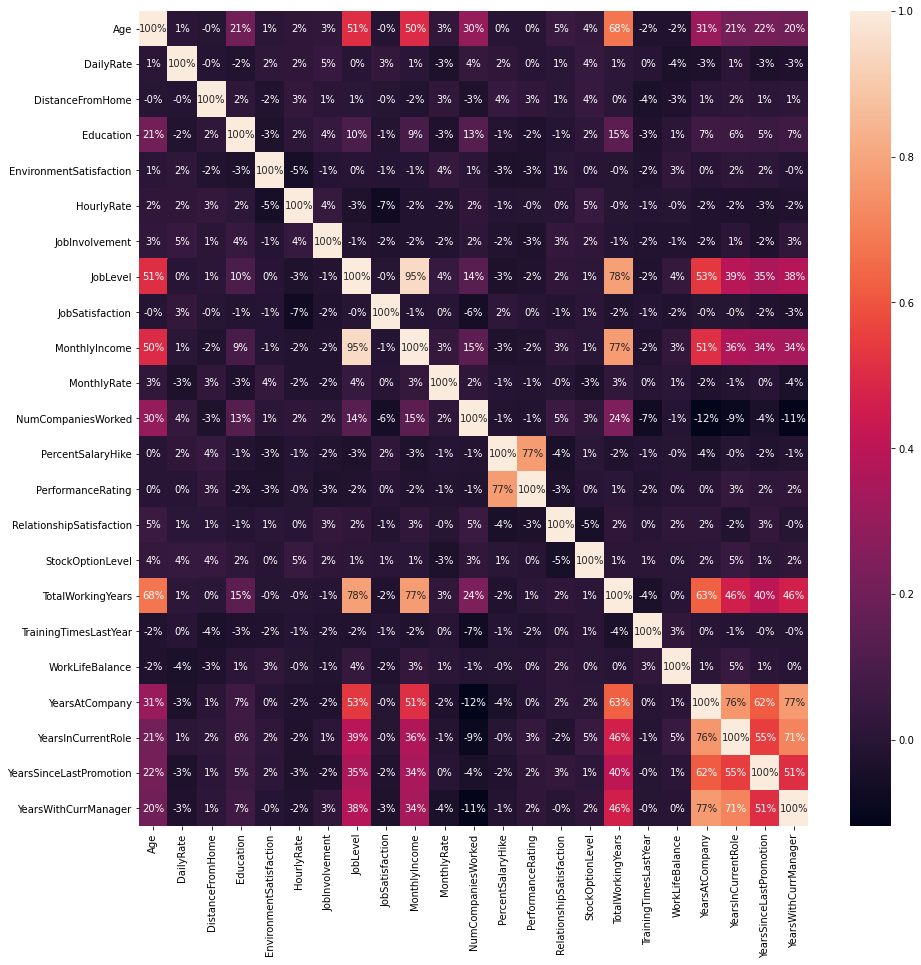

In [78]:
plt.figure(figsize=(15,15))
sns.heatmap(Hrdf.corr(),annot=True,fmt='.0%')

(i) TotalWorking years is highly Correlated with Age, Joblevel,monthlyincome, Years at company etc

(ii) Years at company highly correlated with joblevel, Monthlyincome,years with cureent role Yearsworkwith current manager etc

# Encoding of categorical data

In [82]:
from sklearn.preprocessing import LabelEncoder

# code for encoding the object datatype
for column in Hrdf.columns:
    if Hrdf[column].dtype == np.number:
        continue
    Hrdf[column]=LabelEncoder().fit_transform(Hrdf[column])

In [84]:
Hrdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

# Removing Outliers

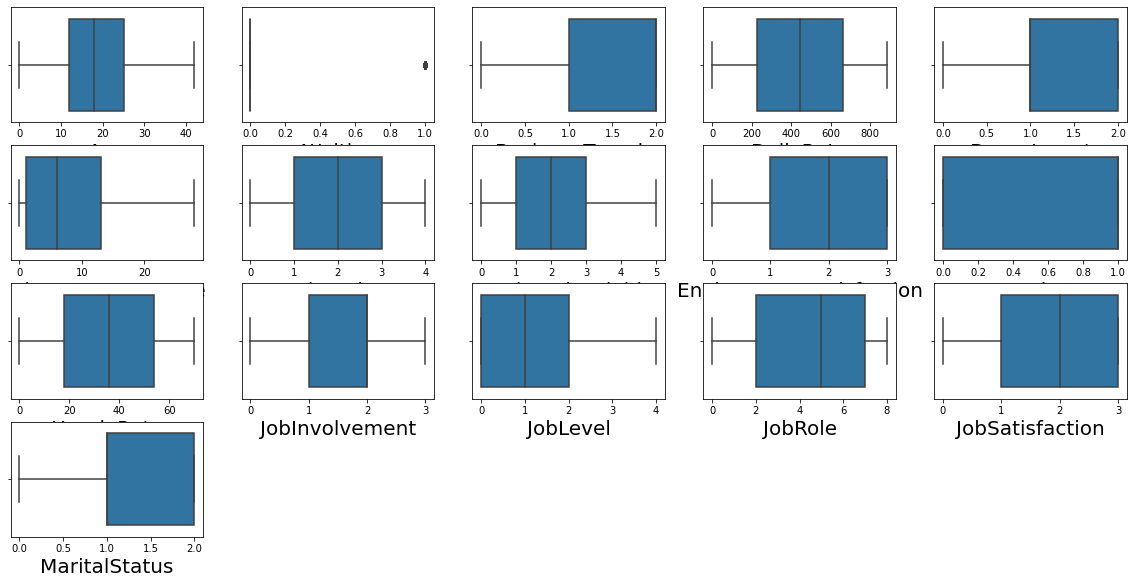

In [85]:
# checking for outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in Hrdf.columns:
    if plotnum<=16:
        plt.subplot(10,5,plotnum)
        sns.boxplot(Hrdf[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [86]:
# saving the z score values
from scipy.stats import zscore  
z=np.abs(zscore(Hrdf))
z.shape

(1470, 31)

In [87]:
threshold=3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 

In [88]:
# creating new dataframe with zscore values less than 3
Hrdf_new=Hrdf[(z<3).all(axis=1)] # removed the outliers more than3 
print(Hrdf.shape)
print(Hrdf_new.shape)

(1470, 31)
(1387, 31)


In [89]:
# calculate the loss of data
loss=(1470-1387)*100/1470
loss

5.64625850340136

we will accept loss of 5.6 %

# Removing the Skewness

In [90]:
# checking the skewness
Hrdf.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                   0.000930
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.060816
MonthlyRate                 0.012315
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.112899
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

Though there are little skewness but the model is performing well without removing skewness, so we can avoid it

# Separating of feature and Target

In [91]:
Hrdf['Age Year']=Hrdf['Age']
Hrdf.drop(columns='Age',axis=1,inplace=True)
Hrdf.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age Year
0,1,2,624,2,0,1,1,1,0,64,...,0,0,8,0,0,6,4,0,5,23
1,0,1,113,1,7,0,1,2,1,31,...,3,1,10,3,2,10,7,1,7,31
2,1,2,805,1,1,1,4,3,1,62,...,1,0,7,3,2,0,0,0,0,19
3,0,1,820,1,2,3,1,3,0,26,...,2,0,8,3,2,8,7,3,0,15
4,0,2,312,1,1,0,3,0,1,10,...,3,1,6,3,2,2,2,2,2,9


In [92]:
x=Hrdf.iloc[:,1:]
y=Hrdf.iloc[:,0]
df2=pd.DataFrame(x,columns=x.columns)

# Scaling of data

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

Scaling of data is complete

# Correlation Picture

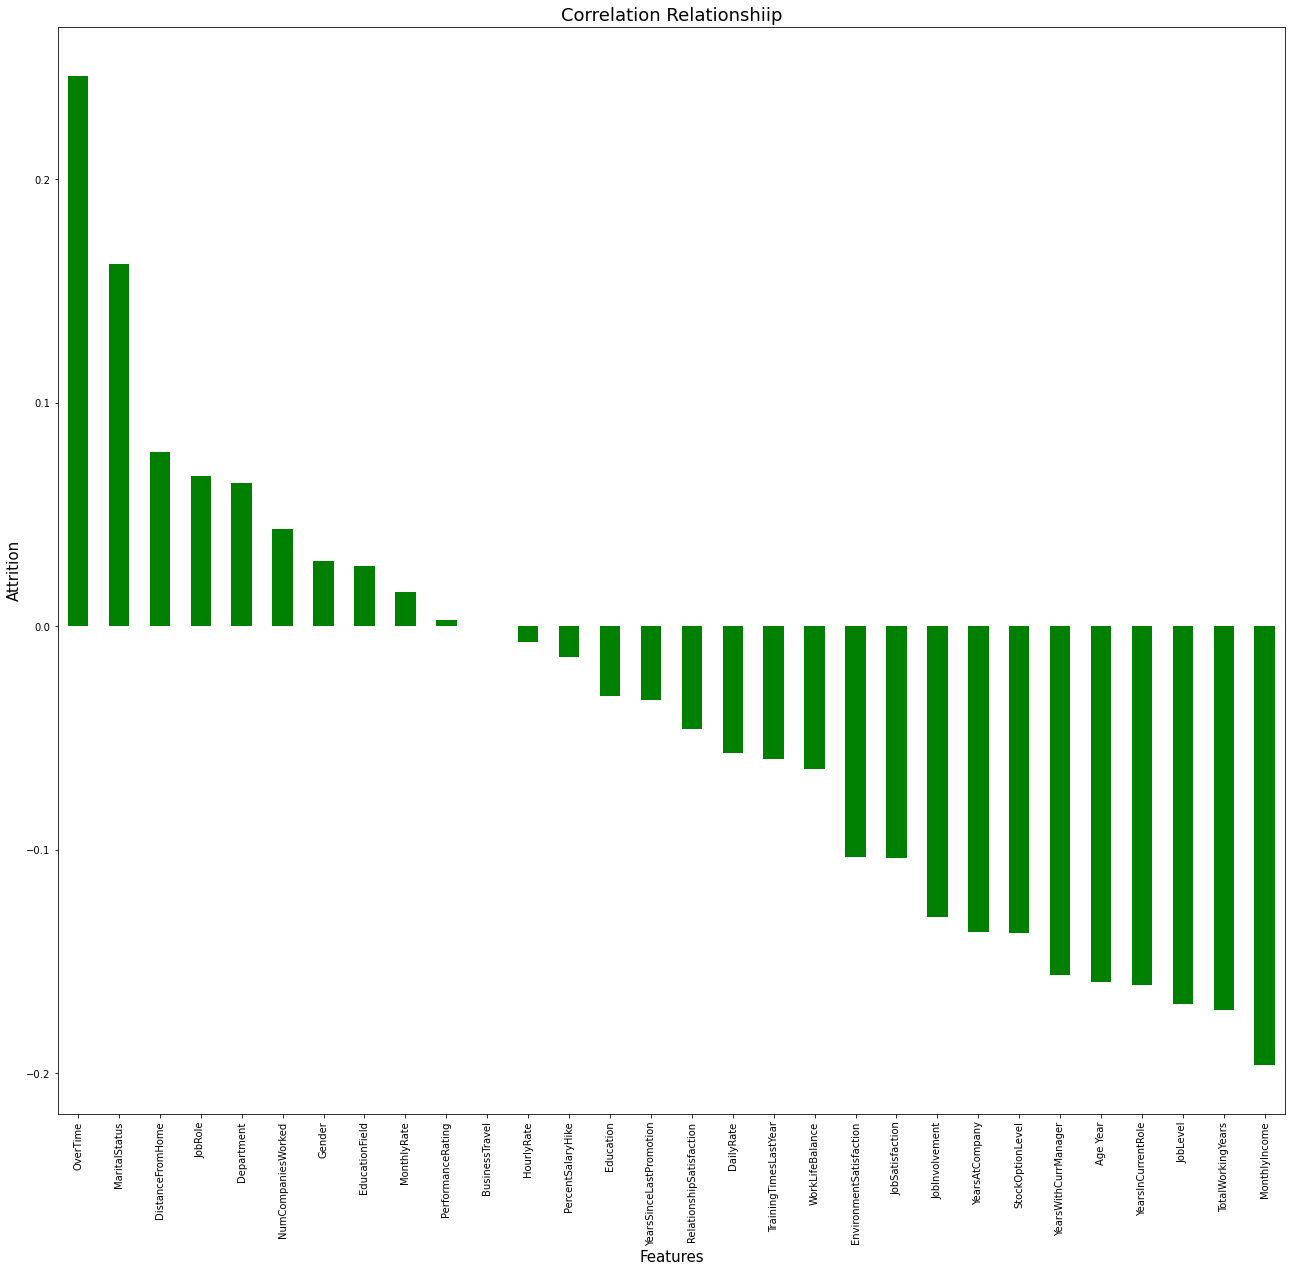

In [94]:
# finding the positive and negetive correlated features
plt.figure(figsize=(22,20))
Hrdf.corr()['Attrition'].sort_values(ascending = False).drop(['Attrition']).plot(kind='bar',color = 'g')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Attrition',fontsize=15)
plt.title('Correlation Relationshiip',fontsize=18)
plt.show()

# Feature Selection

Checking for Multicollinearity

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
vif=pd.DataFrame()

In [97]:
vif['Features']=df2.columns 
vif['vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif

,Features,vif
0,BusinessTravel,6.392891
1,DailyRate,3.989722
2,Department,13.025917
3,DistanceFromHome,2.024150
4,Education,4.681567
5,EducationField,3.784965
6,EnvironmentSatisfaction,3.424063
7,Gender,2.439360
8,HourlyRate,4.038826
9,JobInvolvement,6.561818


# Priciple Component Analysis

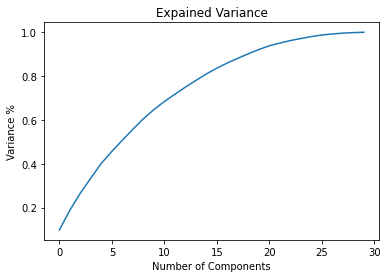

In [98]:
from sklearn.decomposition import PCA
pca=PCA()
principleComponents =pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Expained Variance')
plt.show()

29 components explain 97% variance in data

So we need all the remaining 29 columns

In [99]:
pca=PCA(n_components=29)
comp=pca.fit_transform(x)
principle_x=pd.DataFrame(comp,columns=np.arange(29))

# Selectiong KBest Features

In [100]:
from sklearn.feature_selection import SelectKBest, f_classif
bestfeat=SelectKBest(score_func=f_classif,k=30)
fit=bestfeat.fit(x,y)
Hrdfscores=pd.DataFrame(fit.scores_)
Hrdfcolumns=pd.DataFrame(df2.columns)
Hrdfcolumns.head()
featureScores=pd.concat([Hrdfcolumns,Hrdfscores],axis=1)
featureScores.columns=['Feature','Score']
print(featureScores.nlargest(30,'Score'))

                     Feature      Score
17                  OverTime  94.656457
14             MonthlyIncome  58.750564
22         TotalWorkingYears  44.523640
10                  JobLevel  43.215344
13             MaritalStatus  39.599763
26        YearsInCurrentRole  38.838303
29                  Age Year  38.175887
28      YearsWithCurrManager  36.712311
21          StockOptionLevel  28.140501
25            YearsAtCompany  28.051463
9             JobInvolvement  25.241985
12           JobSatisfaction  15.890004
6    EnvironmentSatisfaction  15.855209
3           DistanceFromHome   8.968277
11                   JobRole   6.649672
2                 Department   6.035877
24           WorkLifeBalance   6.026116
23     TrainingTimesLastYear   5.211646
1                  DailyRate   4.718856
20  RelationshipSatisfaction   3.095576
16        NumCompaniesWorked   2.782287
27   YearsSinceLastPromotion   1.602218
4                  Education   1.446308
7                     Gender   1.274587


In [101]:
x=pd.DataFrame(x,columns=df2.columns)

In [102]:
x=x.drop(columns=['BusinessTravel'])

As per PCA 29 features will be best so removed one feature after applying K best

# Model Building

In [103]:
#Finding the best random state for spliting
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    mod=RandomForestClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)

Best Accuracy is 0.9021739130434783  on Random state 26


In [104]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
# function for model training and accuracy
def model_test(model):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=26)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(model)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print(20*'--')

In [106]:
# instanciation of model
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
gn=GaussianNB()
knn=KNeighborsClassifier(n_neighbors=5)
ad=AdaBoostClassifier(n_estimators=100)
models=[lr,dtc,rfc,gn,knn,ad]

In [107]:
# calling the funciton to find the best accuracy of model
for m in models:
    model_test(m)

LogisticRegression()
0.907608695652174
[[319   7]
 [ 27  15]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       326
           1       0.68      0.36      0.47        42

    accuracy                           0.91       368
   macro avg       0.80      0.67      0.71       368
weighted avg       0.89      0.91      0.89       368

----------------------------------------
DecisionTreeClassifier()
0.8016304347826086
[[281  45]
 [ 28  14]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       326
           1       0.24      0.33      0.28        42

    accuracy                           0.80       368
   macro avg       0.57      0.60      0.58       368
weighted avg       0.83      0.80      0.82       368

----------------------------------------
RandomForestClassifier()
0.8967391304347826
[[321   5]
 [ 33   9]]
              precision    recall  f1-score   support

           0 

# Cross Validation

In [108]:
from sklearn.model_selection import cross_val_score
for m in models:
    score=cross_val_score(m,x,y,cv=5)
    print('Mean Accuracy of ',m)
    print(score.mean())
    print(20*'--')

Mean Accuracy of  LogisticRegression()
0.8700680272108843
----------------------------------------
Mean Accuracy of  DecisionTreeClassifier()
0.7836734693877552
----------------------------------------
Mean Accuracy of  RandomForestClassifier()
0.8544217687074831
----------------------------------------
Mean Accuracy of  GaussianNB()
0.7972789115646258
----------------------------------------
Mean Accuracy of  KNeighborsClassifier()
0.8462585034013606
----------------------------------------
Mean Accuracy of  AdaBoostClassifier(n_estimators=100)
0.8721088435374149
----------------------------------------


# RUC_AUC score

AUC Score of  LogisticRegression()
0.6083375641676538




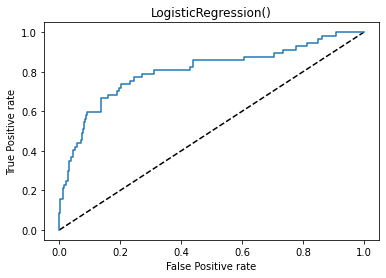

----------------------------------------
AUC Score of  DecisionTreeClassifier()
0.9328989676764258




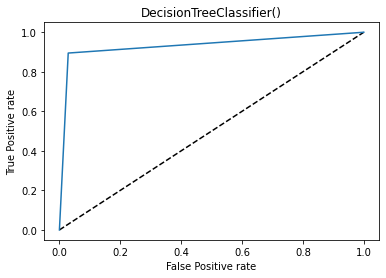

----------------------------------------
AUC Score of  RandomForestClassifier()
0.9545326338353923




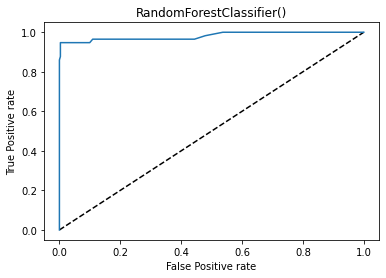

----------------------------------------
AUC Score of  GaussianNB()
0.675466802053365




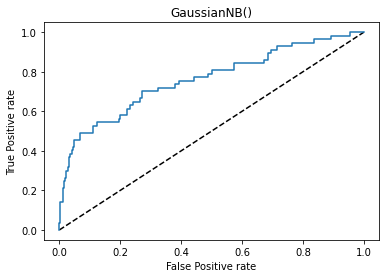

----------------------------------------
AUC Score of  KNeighborsClassifier()
0.6267557962430191




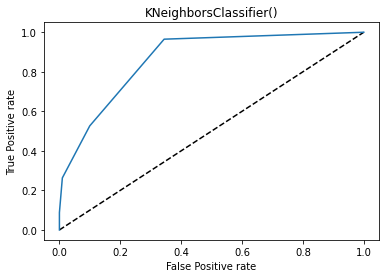

----------------------------------------
AUC Score of  AdaBoostClassifier(n_estimators=100)
0.7175495007615501




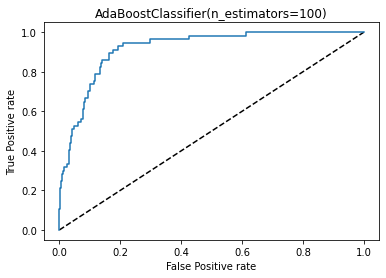

----------------------------------------


In [109]:
from sklearn.metrics import roc_curve, roc_auc_score
for m in models:
    y_pred_prob=m.predict_proba(x_test)[:,1]
    fpr,tpr,thesholds=roc_curve(y_test,y_pred_prob)
    auc_score=roc_auc_score(y_test,m.predict(x_test))
    print('AUC Score of ',m)
    print(auc_score)
    print('\n')
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=m)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(m)
    plt.show()
    print(20*'--')

Based on Accuracy score 91%, Cross Validation 86% and RUC_AUC score 96% we will select RadomForestClassifier as the best fit model for this data set

# Hyper Parameter Tuning

In [123]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[100,200],'criterion':['gini','entropy'],'max_depth':np.arange(2,10),'min_samples_split':[2,3,4,5]},

In [124]:
GSV=GridSearchCV(RandomForestClassifier(),parameters,cv=3)

In [125]:
GSV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=({'criterion': ['gini', 'entropy'],
                          'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                          'min_samples_split': [2, 3, 4, 5],
                          'n_estimators': [100, 200]},))

In [127]:
GSV.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_split': 3,
 'n_estimators': 100}

In [131]:
final_mod=RandomForestClassifier(criterion='gini',max_depth=8,min_samples_split=3,n_estimators=200)
final_mod.fit(x,y)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

92.3913043478261


After hypertuning the model accruracy has increased 1 %

# Saving the Model

In [132]:
import joblib
joblib.dump(final_mod,'HR_Attriion.obj')

['HR_Attriion.obj']

Saved the final Model